<a href="https://colab.research.google.com/github/erivetna87/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import random
import math
import statistics as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from functools import reduce
import warnings 



In [0]:
num_list = [3505,2400,3027,2798,3700,3250,2689]

In [0]:
def mean(numbers):
  total_nums = reduce(lambda x,y: x+y, numbers)
  mean = (total_nums/len(numbers))
  return mean

In [0]:
def median(numbers):
    sort_list = sorted(numbers)
    middle = len(sort_list) // 2
    if len(sort_list) % 2 != 0:
        return sort_list[middle]
    else:
        return mean([sort_list[middle],sort_list[middle-1]])

In [0]:
def mode(numbers):
    mode = max(numbers, key=lambda n: numbers.count(n))
    return mode


In [0]:
def meanMedianMode(numbers):
    mmm_dict = {
        'mean': mean(numbers),
        'median': median(numbers),
        'mode': mode(numbers)
    }
    return mmm_dict

In [32]:
meanMedianMode(num_list)

{'mean': 3052.714285714286, 'median': 3027, 'mode': 3505}

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [33]:
lw_sales = [3505,2400,3027,2798,3700,3250,2689]
lw_customers =  [127,80,105,92,120,115,93]
lw_sales_arr = np.asarray(lw_sales)
lw_customers_arr = np.asarray(lw_customers)
print('Variance needs to exist along the diagonal, Covariances exist off Diagonal','\n')
print('Entire Population: ','\n',np.cov(lw_sales,lw_customers,ddof=0),'\n')
print('Sample of Population: ','\n', np.cov(lw_sales,lw_customers,ddof=1),'\n')
print('Sample variance of lw_sales: {}'.format(np.var(lw_sales,ddof=1)))
print('Sample variance of lw_customers: {}'.format(np.var(lw_customers,ddof=1)),'\n')
print('Population variance of lw_sales: {}'.format(np.var(lw_sales,ddof=0)))
print('Population variance of lw_customers: {}'.format(np.var(lw_customers,ddof=0)))
print('\n')
print('Sample std of lw_sales: {}'.format(np.std(lw_sales,ddof=1)))
print('Sample std of lw_customers: {}'.format(np.std(lw_customers,ddof=1)),'\n')
print('Population std of lw_sales: {}'.format(np.std(lw_sales,ddof=0)))
print('Population std of lw_customers: {}'.format(np.std(lw_customers,ddof=0)))

Variance needs to exist along the diagonal, Covariances exist off Diagonal 

Entire Population:  
 [[183761.06122449   6518.02040816]
 [  6518.02040816    249.3877551 ]] 

Sample of Population:  
 [[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]] 

Sample variance of lw_sales: 214387.90476190473
Sample variance of lw_customers: 290.95238095238096 

Population variance of lw_sales: 183761.06122448976
Population variance of lw_customers: 249.3877551020408


Sample std of lw_sales: 463.0204150595357
Sample std of lw_customers: 17.057326313123664 

Population std of lw_sales: 428.67360686714756
Population std of lw_customers: 15.792015549069118


In [0]:
df_dict = {'lw_sales': lw_sales,'lw_customers': lw_customers}
df = pd.DataFrame(df_dict)

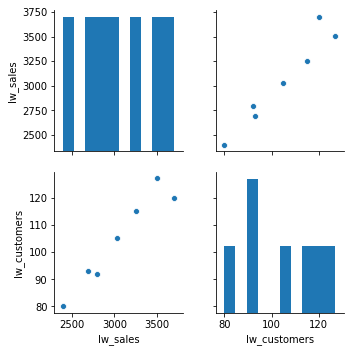

In [35]:
#Positive Linear Relationship based on ScatterPlots 
sns.pairplot(df,vars=['lw_sales','lw_customers'])

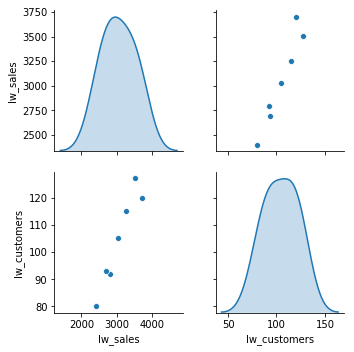

In [36]:
#Positive Linear Relationship based on ScatterPlots 
sns.pairplot(df,diag_kind='kde')

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [37]:
def variance(numbers):
  population_variance = sum((meanMedianMode(numbers)['mean'] - x) ** 2 for x in numbers) / (len(numbers))
  sample_variance = sum((meanMedianMode(numbers)['mean'] - x) ** 2 for x in numbers) / (len(numbers) - 1)
  population_std = math.sqrt(population_variance)
  sample_std = math.sqrt(sample_variance)
  return(population_variance,sample_variance,population_std,sample_std)

"""Assigning Prior Week Sales Variables to Statistical Outputs"""
lwsales_PopVar, \
lwsales_SampVar,\
lwsales_PopStd,\
lwsales_SampStd\
= variance(lw_sales)

"""Assigning Prior Week Customer Variables to Statistical Outputs"""
lwcustomer_PopVar,\
lwcustomer_SampVar,\
lwcustomer_PopStd,\
lwcustomer_SampStd\
= variance(lw_customers)

print(' {} Population Variance: {}'.format('Sales',lwsales_PopVar),'\n',\
       '{} Sample Variance: {}'.format('Sales',lwsales_SampVar),'\n')

print(' {} Population Variance: {}'.format('Customer',lwcustomer_PopVar),'\n',\
      '{} Sample Variance: {}'.format('Customer',lwcustomer_SampVar),'\n')

print(' {} Population std: {}'.format('Sales',lwsales_PopStd),'\n',\
       '{} Sample std: {}'.format('Sales',lwsales_SampStd),'\n')

print(' {} Population std: {}'.format('Customer',lwcustomer_PopStd),'\n',
      '{} Sample std: {}'.format('Customer',lwcustomer_SampStd))

#df.describe doesn't work unless you run all cells. 
df.describe()
  

 Sales Population Variance: 183761.06122448976 
 Sales Sample Variance: 214387.90476190473 

 Customer Population Variance: 249.3877551020408 
 Customer Sample Variance: 290.95238095238096 

 Sales Population std: 428.67360686714756 
 Sales Sample std: 463.0204150595357 

 Customer Population std: 15.792015549069118 
 Customer Sample std: 17.057326313123664


,lw_sales,lw_customers
count,7.000000,7.000000
mean,3052.714286,104.571429
std,463.020415,17.057326
min,2400.000000,80.000000
25%,2743.500000,92.500000
50%,3027.000000,105.000000
75%,3377.500000,117.500000
max,3700.000000,127.000000


In [38]:
"""Running Comparison through NumPy Library"""

print('Population variance of lw_sales: {}'.format(np.var(lw_sales,ddof=0)))
print('Sample variance of lw_sales: {}'.format(np.var(lw_sales,ddof=1)),'\n')

print('Population variance of lw_customers: {}'.format(np.var(lw_customers,ddof=0)))
print('Sample variance of lw_customers: {}'.format(np.var(lw_customers,ddof=1)),'\n')

print('Population std of lw_sales: {}'.format(np.std(lw_sales,ddof=0)))
print('Sample std of lw_sales: {}'.format(np.std(lw_sales,ddof=1)),'\n')
print('Population std of lw_customers: {}'.format(np.std(lw_customers,ddof=0)))
print('Sample std of lw_customers: {}'.format(np.std(lw_customers,ddof=1)))


Population variance of lw_sales: 183761.06122448976
Sample variance of lw_sales: 214387.90476190473 

Population variance of lw_customers: 249.3877551020408
Sample variance of lw_customers: 290.95238095238096 

Population std of lw_sales: 428.67360686714756
Sample std of lw_sales: 463.0204150595357 

Population std of lw_customers: 15.792015549069118
Sample std of lw_customers: 17.057326313123664


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

tic_df = pd.read_csv(url)
tic_df.drop(columns=['Unnamed: 0'],inplace=True)

In [40]:
tic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [41]:
tic_df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0
1309,NaN,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,0


In [51]:
tic_df.shape

(1310, 15)

In [52]:
tic_df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [42]:
tic_df.describe(include=[np.object])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1310,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,917,39,64


In [43]:
tic_df.describe(include=[np.number])

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
tic_num_df = tic_df.drop(columns=['name','sex','ticket','cabin','embarked','boat','home.dest'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


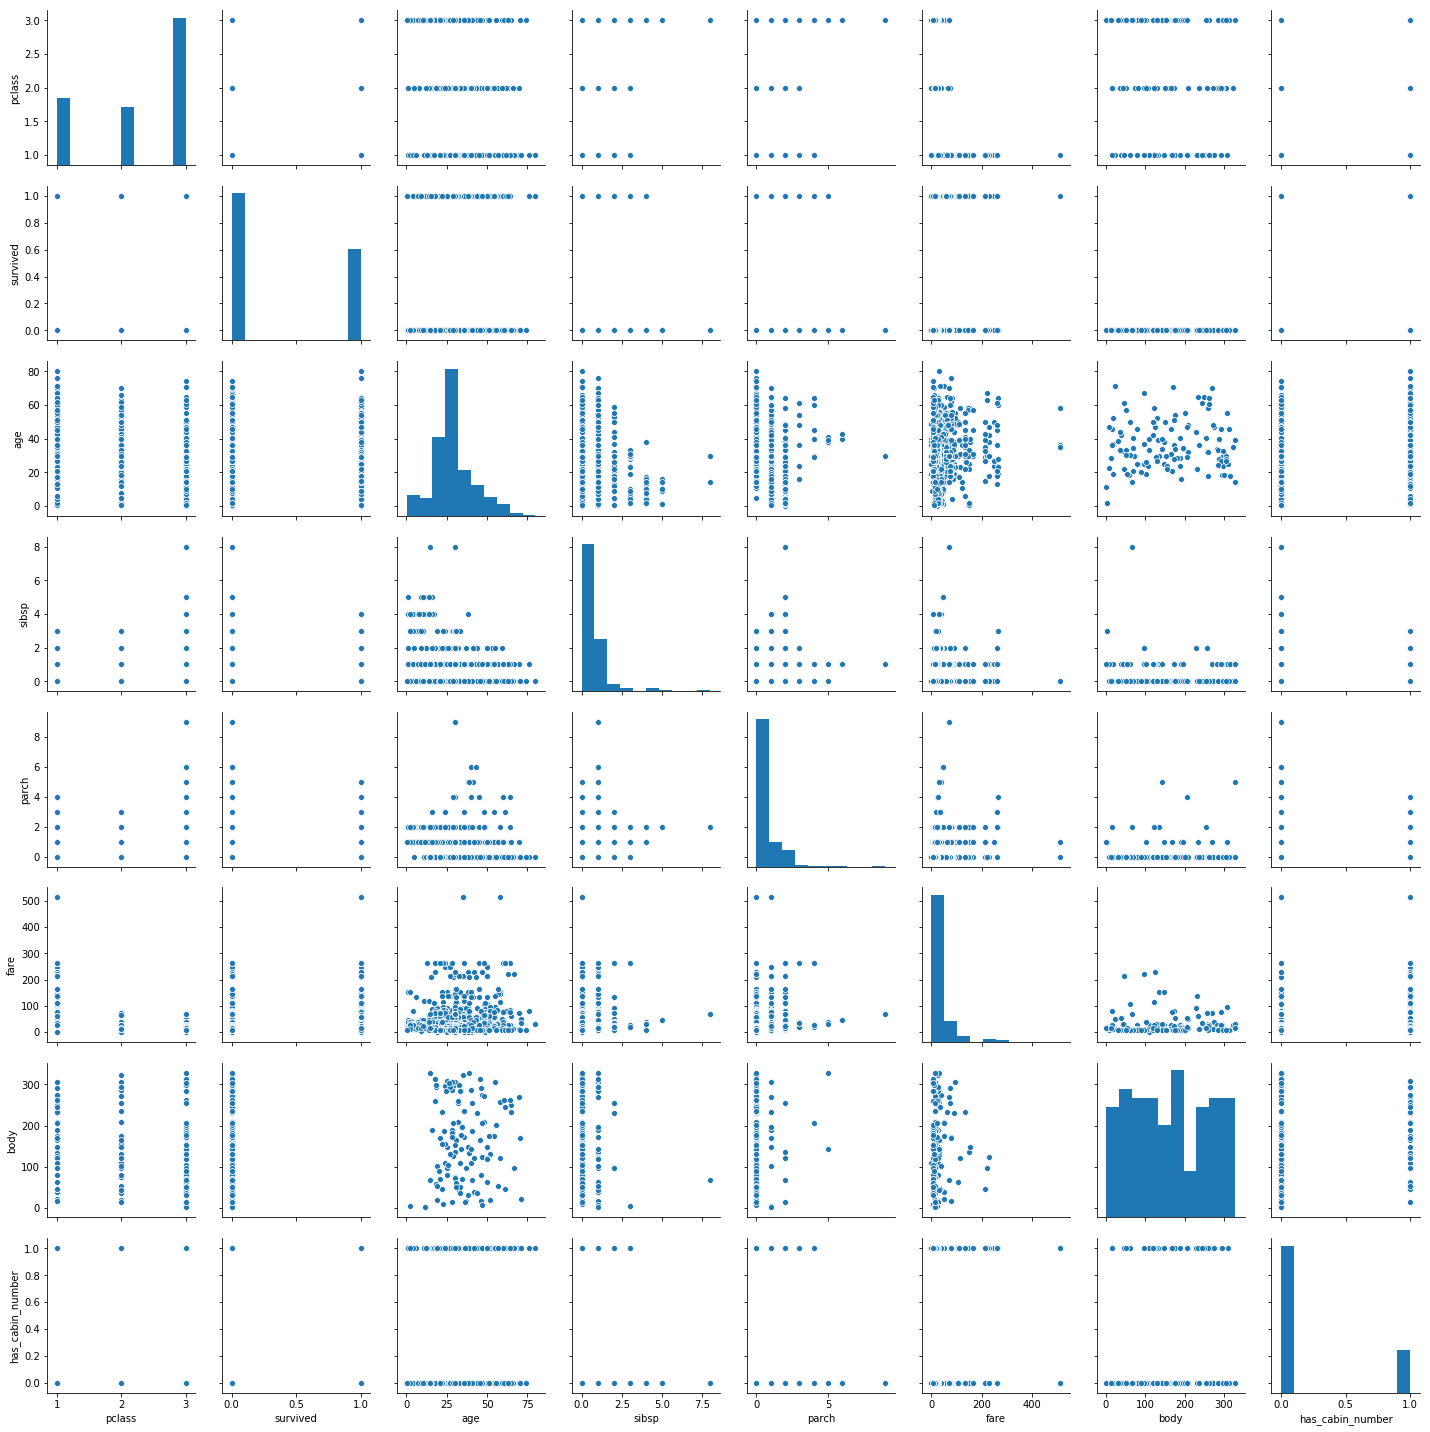

In [45]:
sns.pairplot(tic_num_df)

In [46]:
#Positive Covariance between Age & Body
tic_num_df[['age','body']].cov()

,age,body
age,165.850021,81.622922
body,81.622922,9544.688567


In [49]:
tic_num_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [53]:
tic_num_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


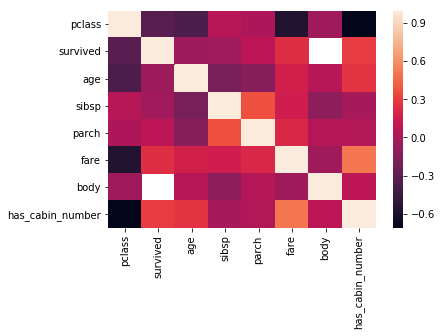

In [54]:
sns.heatmap(tic_num_df.corr())

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Dot Product: 0


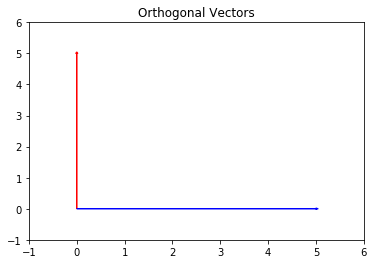

In [74]:
vector_1 = [0, 5]
vector_2 = [5, 0]
print('Dot Product:',np.dot(vector_1,vector_2))
plt.arrow(0,0,vector_1[0],vector_1[1],head_width=.05,head_length=0.05,color='red')
plt.arrow(0,0,vector_2[0],vector_2[1],head_width=.05,head_length=0.05,color='blue')
plt.xlim(-1,6)
plt.ylim(-1,6)
plt.title('Orthogonal Vectors')
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [72]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

#Not Orthogonal as Dot product isn't 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

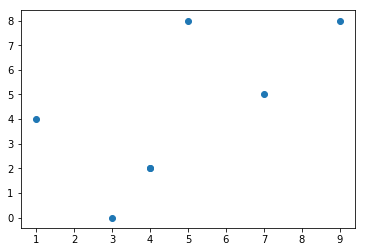

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()